
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [ ]:
## library imports here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import sklearn
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


In [ ]:
counts = ha['cp'].value_counts()
print(counts)

0    128
2     81
1     44
3     20
Name: cp, dtype: int64


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [ ]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

X = ha.drop(['cp'], axis=1)
y = ha['cp']


In [ ]:
#KNN Model

knn_pipeline = Pipeline(
    [("preprocessing", ct),
     ("knn_classifier", KNeighborsClassifier())]
)

#create range of knn values
param_grid = {
    'knn_classifier__n_neighbors': np.arange(1, 101)
}
#define metric for cross validation
gscv = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring= 'accuracy')

#fit the model
gscv_fitted = gscv.fit(X, y)

# Extracting the scores
scores = gscv_fitted.cv_results_['mean_test_score']
df1 = pd.DataFrame({
    "KNN's": np.arange(1,101),
    "Scores": scores
})

df1.sort_values(by='Scores', ascending=False)


,KNN's,Scores
55,56,0.553199
68,69,0.549630
66,67,0.549630
61,62,0.549562
32,33,0.549495
...,...,...
3,4,0.480337
2,3,0.465589
4,5,0.458316
1,2,0.418182


In [ ]:
knn_pipeline = Pipeline(
    [("preprocessing", ct),
     ("knn_classifier", KNeighborsClassifier(n_neighbors=56))]
)

#fit
knn_fitted = knn_pipeline.fit(X,y)

#predict
pred_knn = knn_fitted.predict(X)

pred_knn

#accuracy
accuracy = accuracy_score(y, pred_knn)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.5531135531135531


In [ ]:
#Decision Tree
#Decision Trees Model

tree_pipeline = Pipeline(
    [("preprocessing", ct),
     ("tree_classifier", DecisionTreeClassifier())]
)

#create range of knn values
param_grid = {
    'tree_classifier__min_samples_leaf': np.arange(1,101)
}
#define metric for cross validation
gscv = GridSearchCV(tree_pipeline, param_grid, cv=5, scoring= 'accuracy')

#fit the model
gscv_fitted = gscv.fit(X, y)

# Extracting the scores
scores = gscv_fitted.cv_results_['mean_test_score']
df2 = pd.DataFrame({
    "KNN's": np.arange(1,101),
    "Scores": scores
})

df2.sort_values(by='Scores', ascending=False)


,KNN's,Scores
75,76,0.586330
87,88,0.586330
76,77,0.586330
78,79,0.586330
79,80,0.586330
...,...,...
5,6,0.447071
1,2,0.417643
3,4,0.417576
2,3,0.399327


In [ ]:
#DT pipeline
tree_pipeline = Pipeline(
    [("preprocessing", ct),
     ("tree_classifier", DecisionTreeClassifier(min_samples_leaf=75))]
)

#fit model
DT_fit = tree_pipeline.fit(X,y)

#predict
pred_2 = DT_fit.predict(X)

#Accuracy
accuracy = accuracy_score(y, pred_2)
print(accuracy)

0.575091575091575


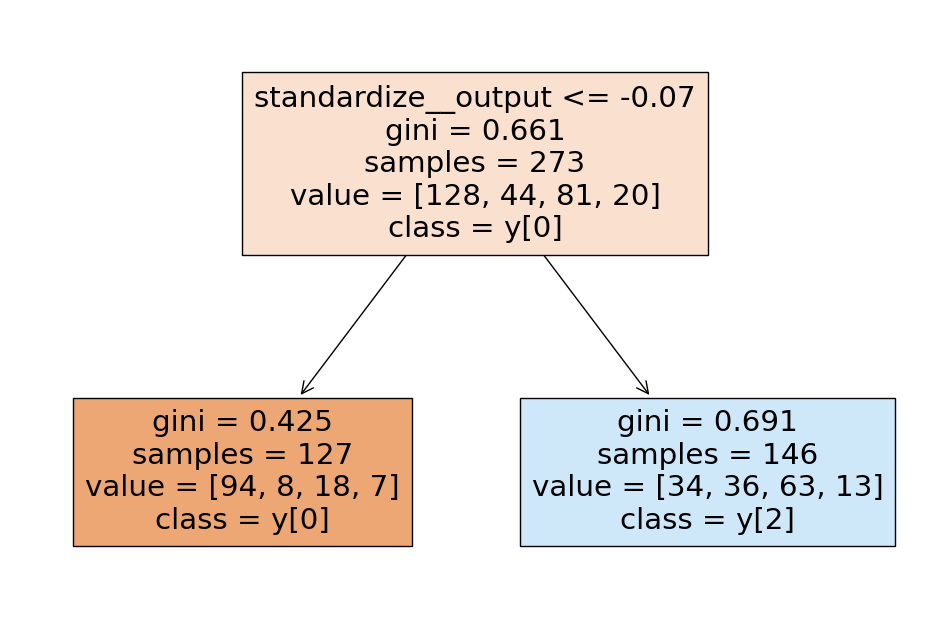

In [ ]:
#print the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Access the fitted decision tree classifier
tree_classifier = DT_fit.named_steps['tree_classifier']

# Visualize the decision tree
plt.figure(figsize=(12, 8))  # Set the size of the figure
plot_tree(tree_classifier, filled=True, feature_names=ct.get_feature_names_out(), class_names=True)
plt.show()


The root node has the condition of output <= -0.07 which separates the samples into groups. Since our response is binary the separation happens close to zero
as we can see. The left branch of the tree contains samples which are less than or equal to -0.07 and judging by the class in the left leaf we can see that they would be predicted to be 0. The right leave contains output values which are higher than -0.07 and predicts classes to be 2.

In [ ]:
#LOG Model

log_pipeline = Pipeline(
    [("preprocessing", ct),
     ("log_classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#fit the model
log_fitted = log_pipeline.fit(X_train,y_train)

#predict outcomes
pred_3 = log_fitted.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, pred_3)
print(accuracy)

0.5797101449275363


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [ ]:
ha['cp_is_3'] = np.where(ha['cp'] == 3, 1, 0)
ha['cp_is_2'] = np.where(ha['cp'] == 2, 1, 0)
ha['cp_is_1'] = np.where(ha['cp'] == 1, 1, 0)
ha['cp_is_0'] = np.where(ha['cp'] == 0, 1, 0)

ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,1,0,0
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,0,0,1
4,57,1,0,140,192,1,148,1,0,0,0,1


In [ ]:
#cp_is_3 model
from sklearn.metrics import f1_score




from sklearn.metrics import f1_score
X = ha.drop(['cp_is_3', 'cp', 'cp_is_2', 'cp_is_1', 'cp_is_0'], axis=1)
y = ha['cp_is_3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


log_pipeline1 = Pipeline(
    [("preprocessing", ct),
     ("log_classifier", LogisticRegression())]
)


log_pipeline1_fitted = log_pipeline1.fit(X_train, y_train)
y_preds_3 = log_pipeline1_fitted.predict(X_test)
f1_cp3 = f1_score(y_test, y_preds_3, average='macro')
f1_cp3



0.4888888888888889

In [ ]:
#cp_is_2 model


from sklearn.metrics import f1_score
X = ha.drop(['cp_is_3', 'cp', 'cp_is_2', 'cp_is_1', 'cp_is_0'], axis=1)
y = ha['cp_is_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


log_pipeline2 = Pipeline(
    [("preprocessing", ct),
     ("log_classifier", LogisticRegression())]
)

log_pipeline2_fitted = log_pipeline2.fit(X_train, y_train)
y_preds_2 = log_pipeline2_fitted.predict(X_test)
f1_cp2 = f1_score(y_test, y_preds_2, average='macro')
f1_cp2

0.4051724137931035

In [ ]:
#cp_is_1 model


from sklearn.metrics import f1_score
X = ha.drop(['cp_is_3', 'cp', 'cp_is_2', 'cp_is_1', 'cp_is_0'], axis=1)
y = ha['cp_is_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


log_pipeline3 = Pipeline(
    [("preprocessing", ct),
     ("log_classifier", LogisticRegression())]
)



log_pipeline3_fitted = log_pipeline3.fit(X_train, y_train)
y_preds_1 = log_pipeline3_fitted.predict(X_test)
f1_cp2 = f1_score(y_test, y_preds_1, average='macro')
f1_cp2

0.448

In [ ]:
#cp_is_0 model


from sklearn.metrics import f1_score
X = ha.drop(['cp_is_3', 'cp', 'cp_is_2', 'cp_is_1', 'cp_is_0'], axis=1)
y = ha['cp_is_0']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


log_pipeline4 = Pipeline(
    [("preprocessing", ct),
     ("log_classifier", LogisticRegression())]
)


log_pipeline4_fitted = log_pipeline4.fit(X_train, y_train)
y_preds_0 = log_pipeline4_fitted.predict(X_test)
f1_cp2 = f1_score(y_test, y_preds_0, average='macro')
f1_cp2

0.7095959595959597

The cp is 0 f1 score was by far the best at 0.71, compared to the second best of 0.49 for cp is 3.




## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [ ]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha['sex'] = ha['sex'].astype(str)
ha['cp'] = ha['cp'].astype(str)
ha['restecg'] = ha['restecg'].astype(str)
ha['output'] = ha['output'].astype(str)

#0 vs 1
ha01 = ha[(ha["cp"] == "0") | (ha["cp"] == "1")]

X = ha01.drop(["cp"], axis = 1) # drop bc identification variables/response variable
y = ha01["cp"]

logisticPipeline = Pipeline(
    [("preprocessing", ct),
     ("logistic_regression", LogisticRegression())]
)

logistic_model_fitted = logisticPipeline.fit(X,y)

#Final Model ROC AUC metric
y_prob = logisticPipeline.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

0.8442826704545455

In [ ]:
#0 vs 2
ha02 = ha[(ha["cp"] == "0") | (ha["cp"] == "2")]

X = ha02.drop(["cp"], axis = 1) # drop bc identification variables/response variable
y = ha02["cp"]

logisticPipeline = Pipeline(
    [("preprocessing", ct),
     ("logistic_regression", LogisticRegression())]
)

logistic_model_fitted = logisticPipeline.fit(X,y)

#Final Model ROC AUC metric
y_prob = logisticPipeline.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

0.8080632716049382

In [ ]:
#0 vs 3
ha03 = ha[(ha["cp"] == "0") | (ha["cp"] == "3")]

X = ha03.drop(["cp"], axis = 1) # drop bc identification variables/response variable
y = ha03["cp"]

logisticPipeline = Pipeline(
    [("preprocessing", ct),
     ("logistic_regression", LogisticRegression())]
)

logistic_model_fitted = logisticPipeline.fit(X,y)

#Final Model ROC AUC metric
y_prob = logisticPipeline.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

0.828125

The best OvO approach at distinguishing is comparing cp=0 to cp=1. The AUC score is 0.84.